# Inception_V3 model summary

In [1]:
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3
model = InceptionV3()
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

# Build fine-tune Inception_V3 model

## Preprocessing: load image

In [3]:
import numpy as np
import time
from keras.applications.inception_v3 import InceptionV3 #CHANGE
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.layers import Dense,Activation,Flatten
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import os

data_path=r"D:\capstone\FGVC_5S_5L"
data = os.listdir(data_path)
print(data) # list of Class_labels

['Calidris alba', 'Gallus gallus domesticus', 'Geococcyx californianus', 'Phoenicopterus roseus', 'Picoides villosus', 'Spheniscus demersus', 'Sterna striata', 'Struthio camelus', 'Thryothorus ludovicianus', 'Tyrannus verticalis']


c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
img_data_list=[]

for dataset in data:
    img_list = os.listdir(data_path+'/'+dataset)
    print('loaded images'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path+'/'+dataset+'/'+img
        #load image
        img = image.load_img(img_path,target_size=(299,299)) 
        #image preprocess
        x = image.img_to_array(img)
        x = np.expand_dims(x,axis=0)
        x = preprocess_input(x)
        img_data_list.append(x)
                
img_data = np.array(img_data_list)
print(img_data.shape)
img_data = np.rollaxis(img_data,1,0)
print(img_data.shape)
img_data = img_data[0]
print(img_data.shape)

num_classes = 10
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:574] = 0
labels[574:671] =1
labels[671:1240] =2
labels[1240:1323]=3
labels[1323:1845]=4
labels[1845:1866]=5
labels[1866:1949]=6
labels[1949:1993]=7
labels[1993:2567]=8
labels[2567:3127]=9

names=['Calidris alba','Gallus gallus domesticus','Geococcyx californianus','Phoenicopterus roseus','Picoides villosus','Spheniscus demersus','Sterna striata','Struthio camelus','Thryothorus ludovicianus','Tyrannus verticalis']



loaded imagesCalidris alba

loaded imagesGallus gallus domesticus

loaded imagesGeococcyx californianus

loaded imagesPhoenicopterus roseus

loaded imagesPicoides villosus

loaded imagesSpheniscus demersus

loaded imagesSterna striata

loaded imagesStruthio camelus

loaded imagesThryothorus ludovicianus

loaded imagesTyrannus verticalis

(3127, 1, 299, 299, 3)
(1, 3127, 299, 299, 3)
(3127, 299, 299, 3)


## Preprocessing: split into train and test set 

In [5]:
Y = np_utils.to_categorical(labels,num_classes)

x,y = shuffle(img_data,Y,random_state=2) 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Fine-tune model summary

In [6]:
image_input = Input(shape=(299,299,3))
model=InceptionV3(input_tensor=image_input,weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [7]:
last_layer = model.get_layer('avg_pool').output
out =Dense(num_classes,activation='softmax',name='output')(last_layer)
custom_InceptionV3_model = Model(image_input,out)
custom_InceptionV3_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

__________________________________________________________________________________________________
conv2d_184 (Conv2D)             (None, 8, 8, 448)    917504      mixed9[0][0]                     
__________________________________________________________________________________________________
batch_normalization_184 (BatchN (None, 8, 8, 448)    1344        conv2d_184[0][0]                 
__________________________________________________________________________________________________
activation_184 (Activation)     (None, 8, 8, 448)    0           batch_normalization_184[0][0]    
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 8, 8, 384)    786432      mixed9[0][0]                     
__________________________________________________________________________________________________
conv2d_185 (Conv2D)             (None, 8, 8, 384)    1548288     activation_184[0][0]             
__________

# Train the fine-tune Inception_V3 model

In [8]:
for layer in custom_InceptionV3_model.layers[:-1]:
    layer.trainable = False
    
print(custom_InceptionV3_model.layers[3].trainable)

custom_InceptionV3_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t=time.time()
hist=custom_InceptionV3_model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,y_test))
print('Taining time:%s' %(t-time.time()))
(loss,accuracy)=custom_InceptionV3_model.evaluate(X_test,y_test,batch_size=10,verbose=1)
print('loss={:.4f},accuracy:{:.4f}%'.format(loss,accuracy*100))

False
Train on 2501 samples, validate on 626 samples
Epoch 1/10
2501/2501 [==============================] - 64s 26ms/step - loss: 1.1579 - acc: 0.6365 - val_loss: 1.1770 - val_acc: 0.5831
Epoch 2/10
2501/2501 [==============================] - 52s 21ms/step - loss: 0.6496 - acc: 0.8009 - val_loss: 0.5987 - val_acc: 0.7907
Epoch 3/10
2501/2501 [==============================] - 54s 22ms/step - loss: 0.4974 - acc: 0.8433 - val_loss: 0.6946 - val_acc: 0.7540
Epoch 4/10
2501/2501 [==============================] - 53s 21ms/step - loss: 0.4164 - acc: 0.8633 - val_loss: 0.9075 - val_acc: 0.6581
Epoch 5/10
2501/2501 [==============================] - 53s 21ms/step - loss: 0.3660 - acc: 0.8880 - val_loss: 0.6405 - val_acc: 0.7859
Epoch 6/10
2501/2501 [==============================] - 55s 22ms/step - loss: 0.3345 - acc: 0.8900 - val_loss: 0.7709 - val_acc: 0.7236
Epoch 7/10
2501/2501 [==============================] - 54s 22ms/step - loss: 0.3183 - acc: 0.8972 - val_loss: 0.5016 - val_acc: 0.

In [9]:
custom_InceptionV3_model.save('Inception_V3_10epoch_1.h5')

# Predict and evaluate the fine-tune Inception_V3 model

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
Y_pred=custom_InceptionV3_model.predict(X_test)
y_pred=np.argmax(Y_pred,axis=1)

## Classification report

In [11]:
target_names=['Calidris alba','Gallus gallus domesticus','Geococcyx californianus','Phoenicopterus roseus','Picoides villosus','Spheniscus demersus','Sterna striata','Struthio camelus','Thryothorus ludovicianus','Tyrannus verticalis']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))

                          precision    recall  f1-score   support

           Calidris alba       0.92      0.94      0.93       125
Gallus gallus domesticus       1.00      0.44      0.62        18
 Geococcyx californianus       0.91      0.77      0.83       116
   Phoenicopterus roseus       0.79      1.00      0.88        11
       Picoides villosus       0.92      0.66      0.77       104
     Spheniscus demersus       1.00      0.38      0.55         8
          Sterna striata       0.67      0.53      0.59        15
        Struthio camelus       1.00      0.75      0.86         8
Thryothorus ludovicianus       0.80      0.76      0.78       108
     Tyrannus verticalis       0.62      0.98      0.76       113

             avg / total       0.84      0.81      0.81       626



## Plot confusion matrix

In [12]:
cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred)

In [13]:
import matplotlib.pyplot as plt
import itertools

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


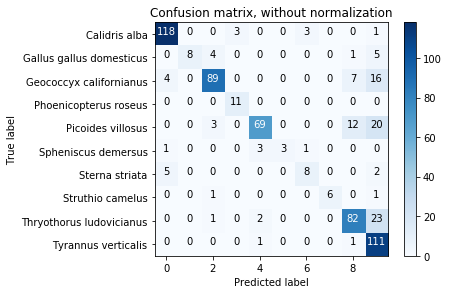

In [15]:
plt.figure()
plot_confusion_matrix(cm, classes=target_names,title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix


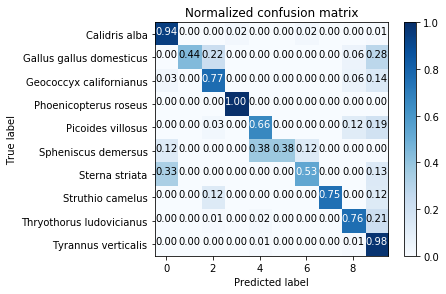

In [16]:
plot_confusion_matrix(cm, classes=target_names, normalize=True,title='Normalized confusion matrix')

## Activation Maps

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
from keras.preprocessing import image
from keras import backend as K

In [18]:
data_path=r"D:\capstone\FGVC_5S_5L"
class_labels = os.listdir(data_path)
print(class_labels)
#model = load_model('Inception_V3_10epoch_1.h5')
class_to_label = {c:i for i,c in enumerate(class_labels)}

['Calidris alba', 'Gallus gallus domesticus', 'Geococcyx californianus', 'Phoenicopterus roseus', 'Picoides villosus', 'Spheniscus demersus', 'Sterna striata', 'Struthio camelus', 'Thryothorus ludovicianus', 'Tyrannus verticalis']


In [19]:
# Last convolutional layer name, search it first using model.summary()
last_conv_layer_name = r'mixed10'
# Dimension of images used to train the model (after resizing)
train_model_width = 299
train_model_height = 299

In [20]:
# The main function
# Taken from the Deep Learning with Python textbook, with a little bit of modification to generalize it
def generate_prediction_heatmap(model, class_labels, 
                                train_model_width, train_model_height, 
                                last_conv_layer_name,
                                input_image_path,
                                output_image_dir,
                                heatmap_class_label=-1,
                                verbose=True):
    if verbose:
        print('Loading image from:', input_image_path)
    img = image.load_img(input_image_path, target_size=(train_model_height,train_model_width))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    
    y_prob = model.predict(x)
    y_class = y_prob.argmax(axis=-1)[0]
    if verbose:
        print('-'*20)
        for i,prob in enumerate(y_prob[0]):
            print('Class:',class_labels[i],', probability:','{:.4f}'.format(prob))
        print('-'*20)
        print('Predicted :', class_labels[y_class], 'as the best class')
    # Use the supplied label to generate the heatmap if supplied, use the best class otherwise
    y_class = y_class if heatmap_class_label == -1 else heatmap_class_label

    out = model.output[:,y_class]
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grads = K.gradients(out, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0,1,2))
    iterate = K.Function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(last_conv_layer.output_shape[-1]):
        conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap,0)
    heatmap /= np.max(heatmap)  

    img = cv2.imread(input_image_path)
    # Need to be converted due to weird colour ordering of the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    
    output_image_path = os.path.join(output_image_dir, os.path.basename(input_image_path))
    if verbose:
        print('Generating output heatmap image at:',output_image_path)
        print()
    cv2.imwrite(output_image_path, superimposed_img)

In [26]:
# Main script for the input and output image stuff, change this!
input_image_dir = r'D:\capstone\FGVC_5S_5L\Spheniscus demersus'
input_image_name = r'5cac23a323a2baf8e3442e9660ce5d2b.jpg'
output_image_dir = r'D:\capstone\Dummy\temp_out\heatmap'
# -------------------------------------------------------- ----------
input_image_path = os.path.join(input_image_dir,input_image_name)
generate_prediction_heatmap(custom_InceptionV3_model, class_labels, 
                            train_model_width, train_model_height, 
                            last_conv_layer_name, 
                            input_image_path, output_image_dir)

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\5cac23a323a2baf8e3442e9660ce5d2b.jpg
--------------------
Class: Calidris alba , probability: 0.0001
Class: Gallus gallus domesticus , probability: 0.0000
Class: Geococcyx californianus , probability: 0.0011
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.7417
Class: Spheniscus demersus , probability: 0.2527
Class: Sterna striata , probability: 0.0000
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0007
Class: Tyrannus verticalis , probability: 0.0037
--------------------
Predicted : Picoides villosus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap\5cac23a323a2baf8e3442e9660ce5d2b.jpg



### Activation map - penguin

In [29]:
input_image_dir = r'D:\capstone\FGVC_5S_5L\Spheniscus demersus'
heatmap_class_label = class_to_label['Spheniscus demersus']
output_image_dir = r'D:\capstone\Dummy\temp_out\heatmap_penguin'
for input_image_name in os.listdir(input_image_dir):
    input_image_path = os.path.join(input_image_dir,input_image_name)
    generate_prediction_heatmap(custom_InceptionV3_model, class_labels, 
                                train_model_width, train_model_height, 
                                last_conv_layer_name, 
                                input_image_path, output_image_dir, 
                                heatmap_class_label, True)

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\19e63e5919bbf9a2c9f0c390ab0777ae.jpg
--------------------
Class: Calidris alba , probability: 0.0000
Class: Gallus gallus domesticus , probability: 0.0000
Class: Geococcyx californianus , probability: 0.0000
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0258
Class: Spheniscus demersus , probability: 0.9715
Class: Sterna striata , probability: 0.0000
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0000
Class: Tyrannus verticalis , probability: 0.0026
--------------------
Predicted : Spheniscus demersus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_penguin\19e63e5919bbf9a2c9f0c390ab0777ae.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\23a25400f3e3091db4e3d6c7fe0ff9b9.jpg
--------------------
Class: Calidris alba , probability: 0.0136
Class: Gallus gallus domesticus , pro

c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_penguin\3ca758227284a0afbec3c1066ef4a774.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\51aae4dceb1acc6b98e63b474ce00996.jpg
--------------------
Class: Calidris alba , probability: 0.0000
Class: Gallus gallus domesticus , probability: 0.0000
Class: Geococcyx californianus , probability: 0.0070
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.9772
Class: Spheniscus demersus , probability: 0.0093
Class: Sterna striata , probability: 0.0002
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0005
Class: Tyrannus verticalis , probability: 0.0058
--------------------
Predicted : Picoides villosus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_penguin\51aae4dceb1acc6b98e63b474ce00996.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\5cac23a323a2baf8e3442e9

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_penguin\b1ecf60509f1aba9fc644b47403d12e7.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\b34cb6332fbda90fb0b7dd27971f76e8.jpg
--------------------
Class: Calidris alba , probability: 0.0018
Class: Gallus gallus domesticus , probability: 0.0000
Class: Geococcyx californianus , probability: 0.0171
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0871
Class: Spheniscus demersus , probability: 0.7783
Class: Sterna striata , probability: 0.1081
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0007
Class: Tyrannus verticalis , probability: 0.0068
--------------------
Predicted : Spheniscus demersus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_penguin\b34cb6332fbda90fb0b7dd27971f76e8.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Spheniscus demersus\b69c6b2bb438a465459e0

In [22]:
input_image_dir = r'D:\capstone\FGVC_5S_5L\Gallus gallus domesticus'
heatmap_class_label = class_to_label['Gallus gallus domesticus']
output_image_dir = r'D:\capstone\Dummy\temp_out\heatmap_chicken'
for input_image_name in os.listdir(input_image_dir):
    input_image_path = os.path.join(input_image_dir,input_image_name)
    generate_prediction_heatmap(custom_InceptionV3_model, class_labels, 
                                train_model_width, train_model_height, 
                                last_conv_layer_name, 
                                input_image_path, output_image_dir, 
                                heatmap_class_label, True)

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\0092debc1172a419736a9111f40cd9fe.jpg
--------------------
Class: Calidris alba , probability: 0.0000
Class: Gallus gallus domesticus , probability: 0.9912
Class: Geococcyx californianus , probability: 0.0051
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0001
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0001
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0035
Class: Tyrannus verticalis , probability: 0.0000
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\0092debc1172a419736a9111f40cd9fe.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\00c3ab1ca2b34312d089afff4b9d0d4a.jpg
--------------------
Class: Calidris alba , probability: 0.0002
Class: Gallus gallus d

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\26404fdb07e05c52760c15b730e10807.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\28d35b721c69a780c689f33eee064623.jpg
--------------------
Class: Calidris alba , probability: 0.0000
Class: Gallus gallus domesticus , probability: 0.9977
Class: Geococcyx californianus , probability: 0.0002
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0000
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0000
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0020
Class: Tyrannus verticalis , probability: 0.0001
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\28d35b721c69a780c689f33eee064623.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\2ab482

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\3d594b8813e30be6a766a51886bed6d5.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\3f8d1fcafac7fffc19be3477881d8f24.jpg
--------------------
Class: Calidris alba , probability: 0.0002
Class: Gallus gallus domesticus , probability: 0.9933
Class: Geococcyx californianus , probability: 0.0048
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0001
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0004
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0011
Class: Tyrannus verticalis , probability: 0.0002
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\3f8d1fcafac7fffc19be3477881d8f24.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\4080ea

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\5c543eecd2c90a0ff04f691d0bd3c677.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\5d8f63b2e74153bb3b2b599d32c1a940.jpg
--------------------
Class: Calidris alba , probability: 0.0003
Class: Gallus gallus domesticus , probability: 0.9851
Class: Geococcyx californianus , probability: 0.0012
Class: Phoenicopterus roseus , probability: 0.0003
Class: Picoides villosus , probability: 0.0009
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0007
Class: Struthio camelus , probability: 0.0003
Class: Thryothorus ludovicianus , probability: 0.0106
Class: Tyrannus verticalis , probability: 0.0005
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\5d8f63b2e74153bb3b2b599d32c1a940.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\638982

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\7dca859f55ea2b5502671449e30cf16e.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\7de9760c62b3ba1b931828314648c904.jpg
--------------------
Class: Calidris alba , probability: 0.0002
Class: Gallus gallus domesticus , probability: 0.0106
Class: Geococcyx californianus , probability: 0.0044
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0032
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0007
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.1350
Class: Tyrannus verticalis , probability: 0.8459
--------------------
Predicted : Tyrannus verticalis as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\7de9760c62b3ba1b931828314648c904.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\7fa092a71be

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\93650bda4736c49ca7355f0bf76a17fc.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\96c97503b2ed8286589d6699a61af1dd.jpg
--------------------
Class: Calidris alba , probability: 0.0000
Class: Gallus gallus domesticus , probability: 0.9984
Class: Geococcyx californianus , probability: 0.0003
Class: Phoenicopterus roseus , probability: 0.0000
Class: Picoides villosus , probability: 0.0000
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0000
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0011
Class: Tyrannus verticalis , probability: 0.0001
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\96c97503b2ed8286589d6699a61af1dd.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\979360

c:\users\czho9\anaconda3\envs\tsf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\a2ba4a794486ac2a90cc1a653817a1ef.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\a2bd70ec0f51dbed27c80d84be7cb5dd.jpg
--------------------
Class: Calidris alba , probability: 0.0058
Class: Gallus gallus domesticus , probability: 0.0051
Class: Geococcyx californianus , probability: 0.0260
Class: Phoenicopterus roseus , probability: 0.0001
Class: Picoides villosus , probability: 0.0231
Class: Spheniscus demersus , probability: 0.0004
Class: Sterna striata , probability: 0.0015
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.9248
Class: Tyrannus verticalis , probability: 0.0132
--------------------
Predicted : Thryothorus ludovicianus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\a2bd70ec0f51dbed27c80d84be7cb5dd.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\a37b47

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\bdc10f3af6e2e5c93ae43b8f0ba782d1.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\bdfa6c6aece8e41f9681aeddad11d35b.jpg
--------------------
Class: Calidris alba , probability: 0.0022
Class: Gallus gallus domesticus , probability: 0.8671
Class: Geococcyx californianus , probability: 0.1044
Class: Phoenicopterus roseus , probability: 0.0001
Class: Picoides villosus , probability: 0.0008
Class: Spheniscus demersus , probability: 0.0000
Class: Sterna striata , probability: 0.0167
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0085
Class: Tyrannus verticalis , probability: 0.0001
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\bdfa6c6aece8e41f9681aeddad11d35b.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\bf3e0d

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\dbdb40c4bda084a280181cc820611477.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\e51e00d227cd28d68f6fa4c6cca25905.jpg
--------------------
Class: Calidris alba , probability: 0.0001
Class: Gallus gallus domesticus , probability: 0.9473
Class: Geococcyx californianus , probability: 0.0108
Class: Phoenicopterus roseus , probability: 0.0003
Class: Picoides villosus , probability: 0.0011
Class: Spheniscus demersus , probability: 0.0001
Class: Sterna striata , probability: 0.0007
Class: Struthio camelus , probability: 0.0000
Class: Thryothorus ludovicianus , probability: 0.0381
Class: Tyrannus verticalis , probability: 0.0014
--------------------
Predicted : Gallus gallus domesticus as the best class
Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\e51e00d227cd28d68f6fa4c6cca25905.jpg

Loading image from: D:\capstone\FGVC_5S_5L\Gallus gallus domesticus\e882bb

Generating output heatmap image at: D:\capstone\Dummy\temp_out\heatmap_chicken\fa2913e7d3973730e1eac40549b1f690.jpg

